# Python Basecamp (Chennai)

### Karthikeyan Sankaran, 17th June, 2018

## Unsupervised Machine Learning on Structured data - Clustering
> Market Segmentation of Airline Customers 

Market segmentation is a strategy that divides a broad target market of customers into smaller, more similar groups, and then designs a marketing strategy specifically for each group. Clustering is a common technique for market segmentation since it automatically finds similar groups given a data set. 

In this problem, we'll see how clustering can be used to find similar groups of customers who belong to an airline's frequent flyer program. The airline is trying to learn more about its customers so that it can target different customer segments with different types of mileage offers. The file AirlinesCluster.csv contains information on 3,999 members of the frequent flyer program.

There are seven different variables in the dataset, described below:
* Balance = number of miles eligible for award travel
* QualMiles = number of miles qualifying for TopFlight status
* BonusMiles = number of miles earned from non-flight bonus transactions in the past 12 months
* BonusTrans = number of non-flight bonus transactions in the past 12 months
* FlightMiles = number of flight miles in the past 12 months
* FlightTrans = number of flight transactions in the past 12 months
* DaysSinceEnroll = number of days since enrolled in the frequent flyer program

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

** Read the dataset into a pandas dataframe **

In [2]:
airCust = pd.read_csv('../datasets/AirlinesFreqFliers.csv')
airCust.head()

Balance  QualMiles  BonusMiles  BonusTrans  FlightMiles  FlightTrans  \
0    28143          0         174           1            0            0   
1    19244          0         215           2            0            0   
2    41354          0        4123           4            0            0   
3    14776          0         500           1            0            0   
4    97752          0       43300          26         2077            4   

   DaysSinceEnroll  
0             7000  
1             6968  
2             7034  
3             6952  
4             6935

** Select the columns for clustering **

In [3]:
cluster_columns = ['Balance','QualMiles','BonusMiles','BonusTrans','FlightMiles','FlightTrans','DaysSinceEnroll']

** Scale the data so that all columns are in the same range **

In [4]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()

cluster_df = scaler.fit_transform(airCust[cluster_columns])
cluster_df = pd.DataFrame(cluster_df, columns=cluster_columns)

cluster_df.head()

Balance  QualMiles  BonusMiles  BonusTrans  FlightMiles  FlightTrans  \
0  0.016508        0.0    0.000660    0.011628     0.000000     0.000000   
1  0.011288        0.0    0.000815    0.023256     0.000000     0.000000   
2  0.024257        0.0    0.015636    0.046512     0.000000     0.000000   
3  0.008667        0.0    0.001896    0.011628     0.000000     0.000000   
4  0.057338        0.0    0.164211    0.302326     0.067398     0.075472   

   DaysSinceEnroll  
0         0.843780  
1         0.839923  
2         0.847878  
3         0.837994  
4         0.835945

** Run the KMeans algorithm to create the clusters **

In [5]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=5, random_state=1)  # number of clusters is a parameter
clusters = model.fit_predict(cluster_df)
cluster_df['Cluster'] = clusters
cluster_df.head()

Balance  QualMiles  BonusMiles  BonusTrans  FlightMiles  FlightTrans  \
0  0.016508        0.0    0.000660    0.011628     0.000000     0.000000   
1  0.011288        0.0    0.000815    0.023256     0.000000     0.000000   
2  0.024257        0.0    0.015636    0.046512     0.000000     0.000000   
3  0.008667        0.0    0.001896    0.011628     0.000000     0.000000   
4  0.057338        0.0    0.164211    0.302326     0.067398     0.075472   

   DaysSinceEnroll  Cluster  
0         0.843780        3  
1         0.839923        3  
2         0.847878        3  
3         0.837994        3  
4         0.835945        0

** Find cluster characteristics - Count & Mean values of each feature **

In [6]:
# Find Count
cluster_size = cluster_df.groupby(['Cluster']).size().reset_index()
cluster_size.columns = ['Cluster', 'Count']
cluster_size.head()

Cluster  Count
0        0    407
1        1   1008
2        2   1150
3        3    872
4        4    562

In [7]:
# Find Mean values
cluster_means = cluster_df.groupby(['Cluster'], as_index=False).mean()
cluster_means.head()

Cluster   Balance  QualMiles  BonusMiles  BonusTrans  FlightMiles  \
0        0  0.108878   0.033777    0.227079    0.289869     0.048874   
1        1  0.019504   0.009651    0.016007    0.062131     0.006669   
2        2  0.033922   0.011592    0.038915    0.103680     0.008682   
3        3  0.046449   0.007295    0.048169    0.117586     0.007047   
4        4  0.051882   0.015178    0.115130    0.243979     0.030172   

   FlightTrans  DaysSinceEnroll  
0     0.090167         0.719807  
1     0.010389         0.208147  
2     0.015209         0.524576  
3     0.012442         0.812765  
4     0.050057         0.303453

** Merge the count & mean dataframes **

In [8]:
cluster_summary = pd.merge(cluster_size, cluster_means, on='Cluster')
cluster_summary.head()

Cluster  Count   Balance  QualMiles  BonusMiles  BonusTrans  FlightMiles  \
0        0    407  0.108878   0.033777    0.227079    0.289869     0.048874   
1        1   1008  0.019504   0.009651    0.016007    0.062131     0.006669   
2        2   1150  0.033922   0.011592    0.038915    0.103680     0.008682   
3        3    872  0.046449   0.007295    0.048169    0.117586     0.007047   
4        4    562  0.051882   0.015178    0.115130    0.243979     0.030172   

   FlightTrans  DaysSinceEnroll  
0     0.090167         0.719807  
1     0.010389         0.208147  
2     0.015209         0.524576  
3     0.012442         0.812765  
4     0.050057         0.303453

** Visualize the Clusters using a heatmap to find the defining characteristics for each cluster **

In [9]:
cluster_summary[cluster_columns].transpose()

0         1         2         3         4
Balance          0.108878  0.019504  0.033922  0.046449  0.051882
QualMiles        0.033777  0.009651  0.011592  0.007295  0.015178
BonusMiles       0.227079  0.016007  0.038915  0.048169  0.115130
BonusTrans       0.289869  0.062131  0.103680  0.117586  0.243979
FlightMiles      0.048874  0.006669  0.008682  0.007047  0.030172
FlightTrans      0.090167  0.010389  0.015209  0.012442  0.050057
DaysSinceEnroll  0.719807  0.208147  0.524576  0.812765  0.303453

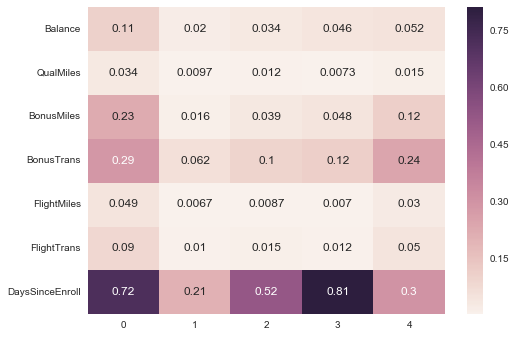

In [10]:
# Visualize the Clusters using a heatmap
sns.heatmap(cluster_summary[cluster_columns].transpose(), annot=True)

** Give meaningful, business focused names to each Cluster ** 

In [15]:
pd.set_option('mode.chained_assignment', None)

cluster_df['Cluster Name'] = ''
cluster_df['Cluster Name'][cluster_df['Cluster']==0] = 'LongTimeCustomer-PointAccumulator'
cluster_df['Cluster Name'][cluster_df['Cluster']==1] = 'New Customer-Infrequent Flier'
cluster_df['Cluster Name'][cluster_df['Cluster']==2] = 'MediumVintage-Occasional Flier'
cluster_df['Cluster Name'][cluster_df['Cluster']==3] = 'Dormant Customer'
cluster_df['Cluster Name'][cluster_df['Cluster']==4] = 'New Customer-Frequent Flier'

cluster_df.head()

Balance  QualMiles  BonusMiles  BonusTrans  FlightMiles  FlightTrans  \
0  0.016508        0.0    0.000660    0.011628     0.000000     0.000000   
1  0.011288        0.0    0.000815    0.023256     0.000000     0.000000   
2  0.024257        0.0    0.015636    0.046512     0.000000     0.000000   
3  0.008667        0.0    0.001896    0.011628     0.000000     0.000000   
4  0.057338        0.0    0.164211    0.302326     0.067398     0.075472   

   DaysSinceEnroll  Cluster                       Cluster Name  
0         0.843780        3                   Dormant Customer  
1         0.839923        3                   Dormant Customer  
2         0.847878        3                   Dormant Customer  
3         0.837994        3                   Dormant Customer  
4         0.835945        0  LongTimeCustomer-PointAccumulator

** Update the original dataframe with cluster details **

In [12]:
airCust = airCust.reset_index().drop('index', axis=1)
airCust['Cluster'] = cluster_df['Cluster']
airCust['Cluster Name'] = cluster_df['Cluster Name']
airCust.head()

Balance  QualMiles  BonusMiles  BonusTrans  FlightMiles  FlightTrans  \
0    28143          0         174           1            0            0   
1    19244          0         215           2            0            0   
2    41354          0        4123           4            0            0   
3    14776          0         500           1            0            0   
4    97752          0       43300          26         2077            4   

   DaysSinceEnroll  Cluster                       Cluster Name  
0             7000        3                   Dormant Customer  
1             6968        3                   Dormant Customer  
2             7034        3                   Dormant Customer  
3             6952        3                   Dormant Customer  
4             6935        0  LongTimeCustomer-PointAccumulator

** Randomly select some records to understand the clustering output **

In [13]:
airCust.sample(5)

Balance  QualMiles  BonusMiles  BonusTrans  FlightMiles  FlightTrans  \
904     15835          0      112171          16            0            0   
3740    25054          0       32592          17         3409            6   
3400     5625          0        2350          12            0            0   
1744   109114          0       31956          27            0            0   
3177    43285          0         745           3            0            0   

      DaysSinceEnroll  Cluster                       Cluster Name  
904              5825        0  LongTimeCustomer-PointAccumulator  
3740              486        1      New Customer-Infrequent Flier  
3400             1270        1      New Customer-Infrequent Flier  
1744             4512        2     MediumVintage-Occasional Flier  
3177             2436        1      New Customer-Infrequent Flier

** [Optional] - Finding optimal number of clusters **

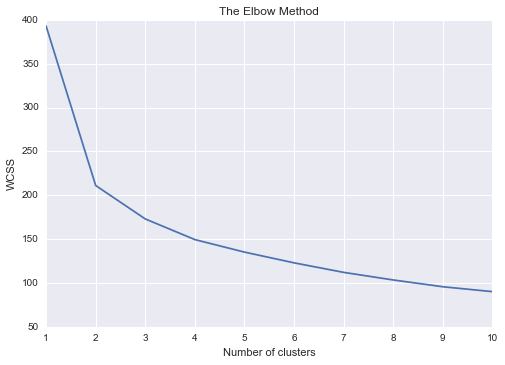

In [14]:
# Function to find optimal number of clusters using elbow method
def find_optimal_num_clusters(df):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
        kmeans.fit(df)
        wcss.append(kmeans.inertia_)

    plt.plot(range(1, 11), wcss)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
    
# Using the elbow method to find the optimal number of clusters
find_optimal_num_clusters(cluster_df[cluster_columns])